In [1]:
import evaluation as eval
import pickle as pkl
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

min_list = [None, None, None, None, None]
max_list = [None, None, None, None, None]

path_results = "/home/hexa/ejmcmk/results"
path_resims = "/home/hexa/ejmcmk/resims/resim_outputs"
folder_name = "model_lstm_v2"
n_folds = 1
fold_num = 1
folder_path = os.path.join(path_results, folder_name)
save_dir = folder_path

# get results
#losses, train_results, valid_results = eval.get_results(folder_path, n_folds, fold_num)
fold_results = eval.get_all_results(folder_path, n_folds)

In [2]:
# gather configuration info
model_info = eval.gather_info(folder_path)

Evaluation item saved to /home/hexa/ejmcmk/results/model_lstm_v3/loss_plots/model_lstm_v3.pdf


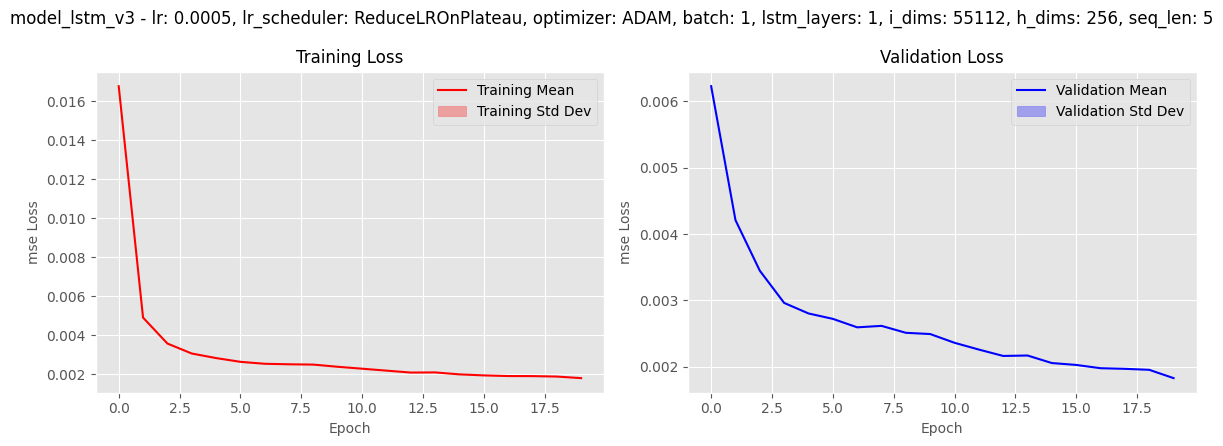

In [4]:
eval.plot_loss(model_info, fold_results, min_list, max_list, save_fig=True, save_dir=save_dir)

In [5]:
eval.print_metrics(fold_results, dataset='train', save_fig=True, save_dir=save_dir)
eval.print_metrics(fold_results, dataset='valid', save_fig=True, save_dir=save_dir)

Evaluation item saved to /home/hexa/ejmcmk/results/model_lstm_v2/dft_plots/Specific Fold -  Fold 1 - Training Dataset - polar_dft_sample_idx_4_polar.pdf


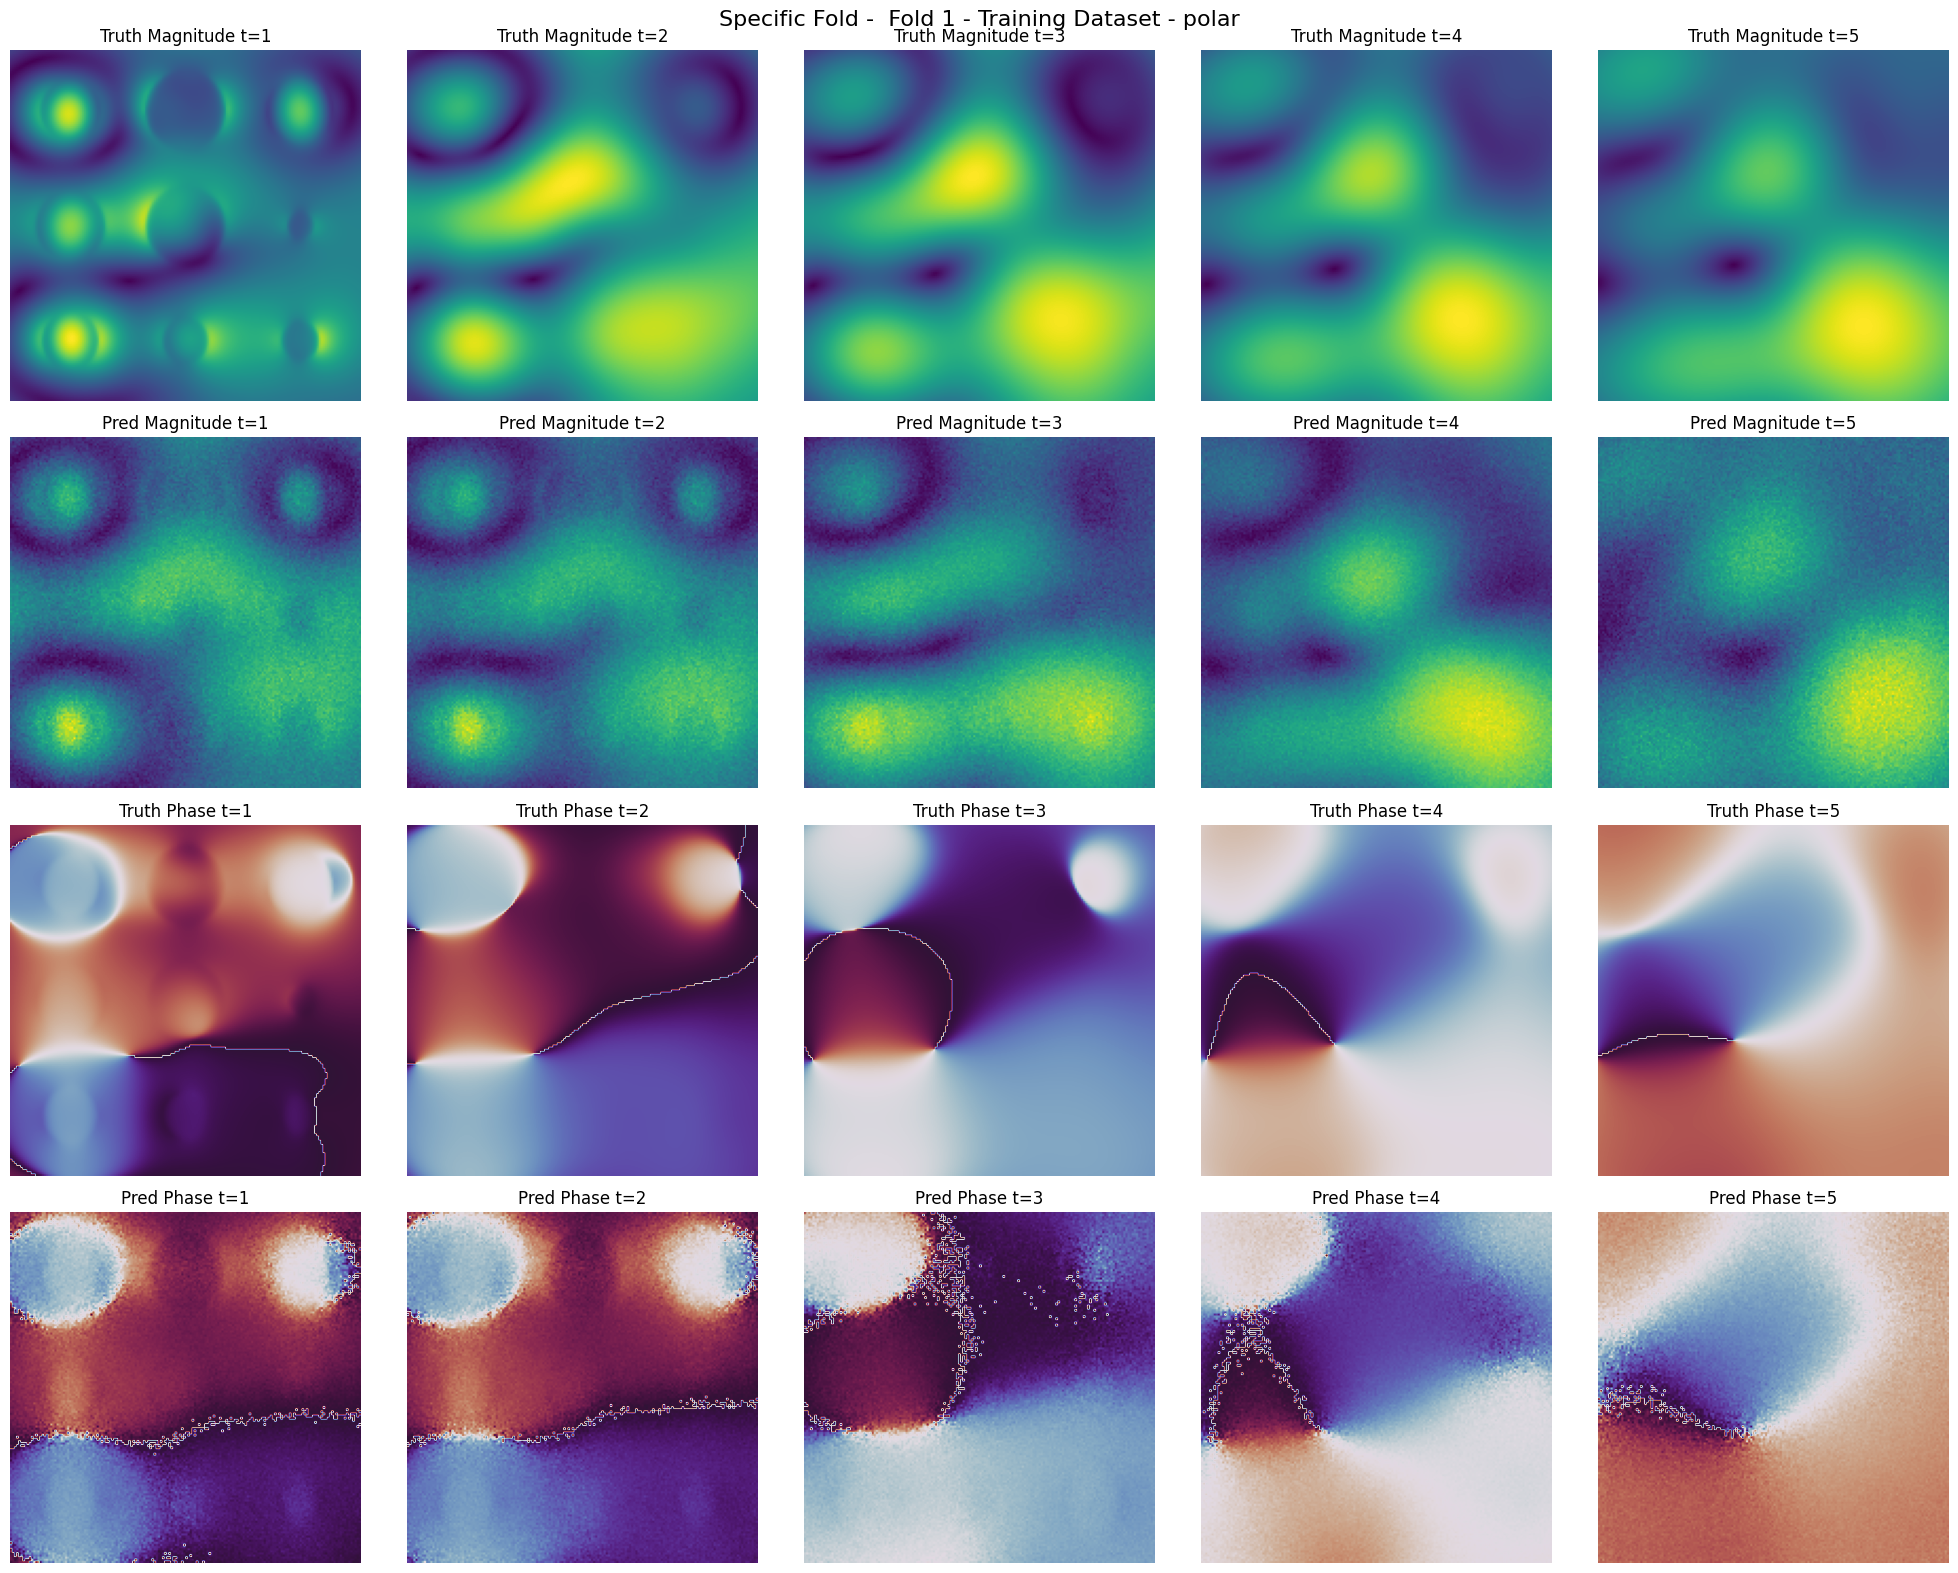

Evaluation item saved to /home/hexa/ejmcmk/results/model_lstm_v2/dft_plots/Specific Fold -  Fold 1 - Validation Dataset - polar_dft_sample_idx_4_polar.pdf


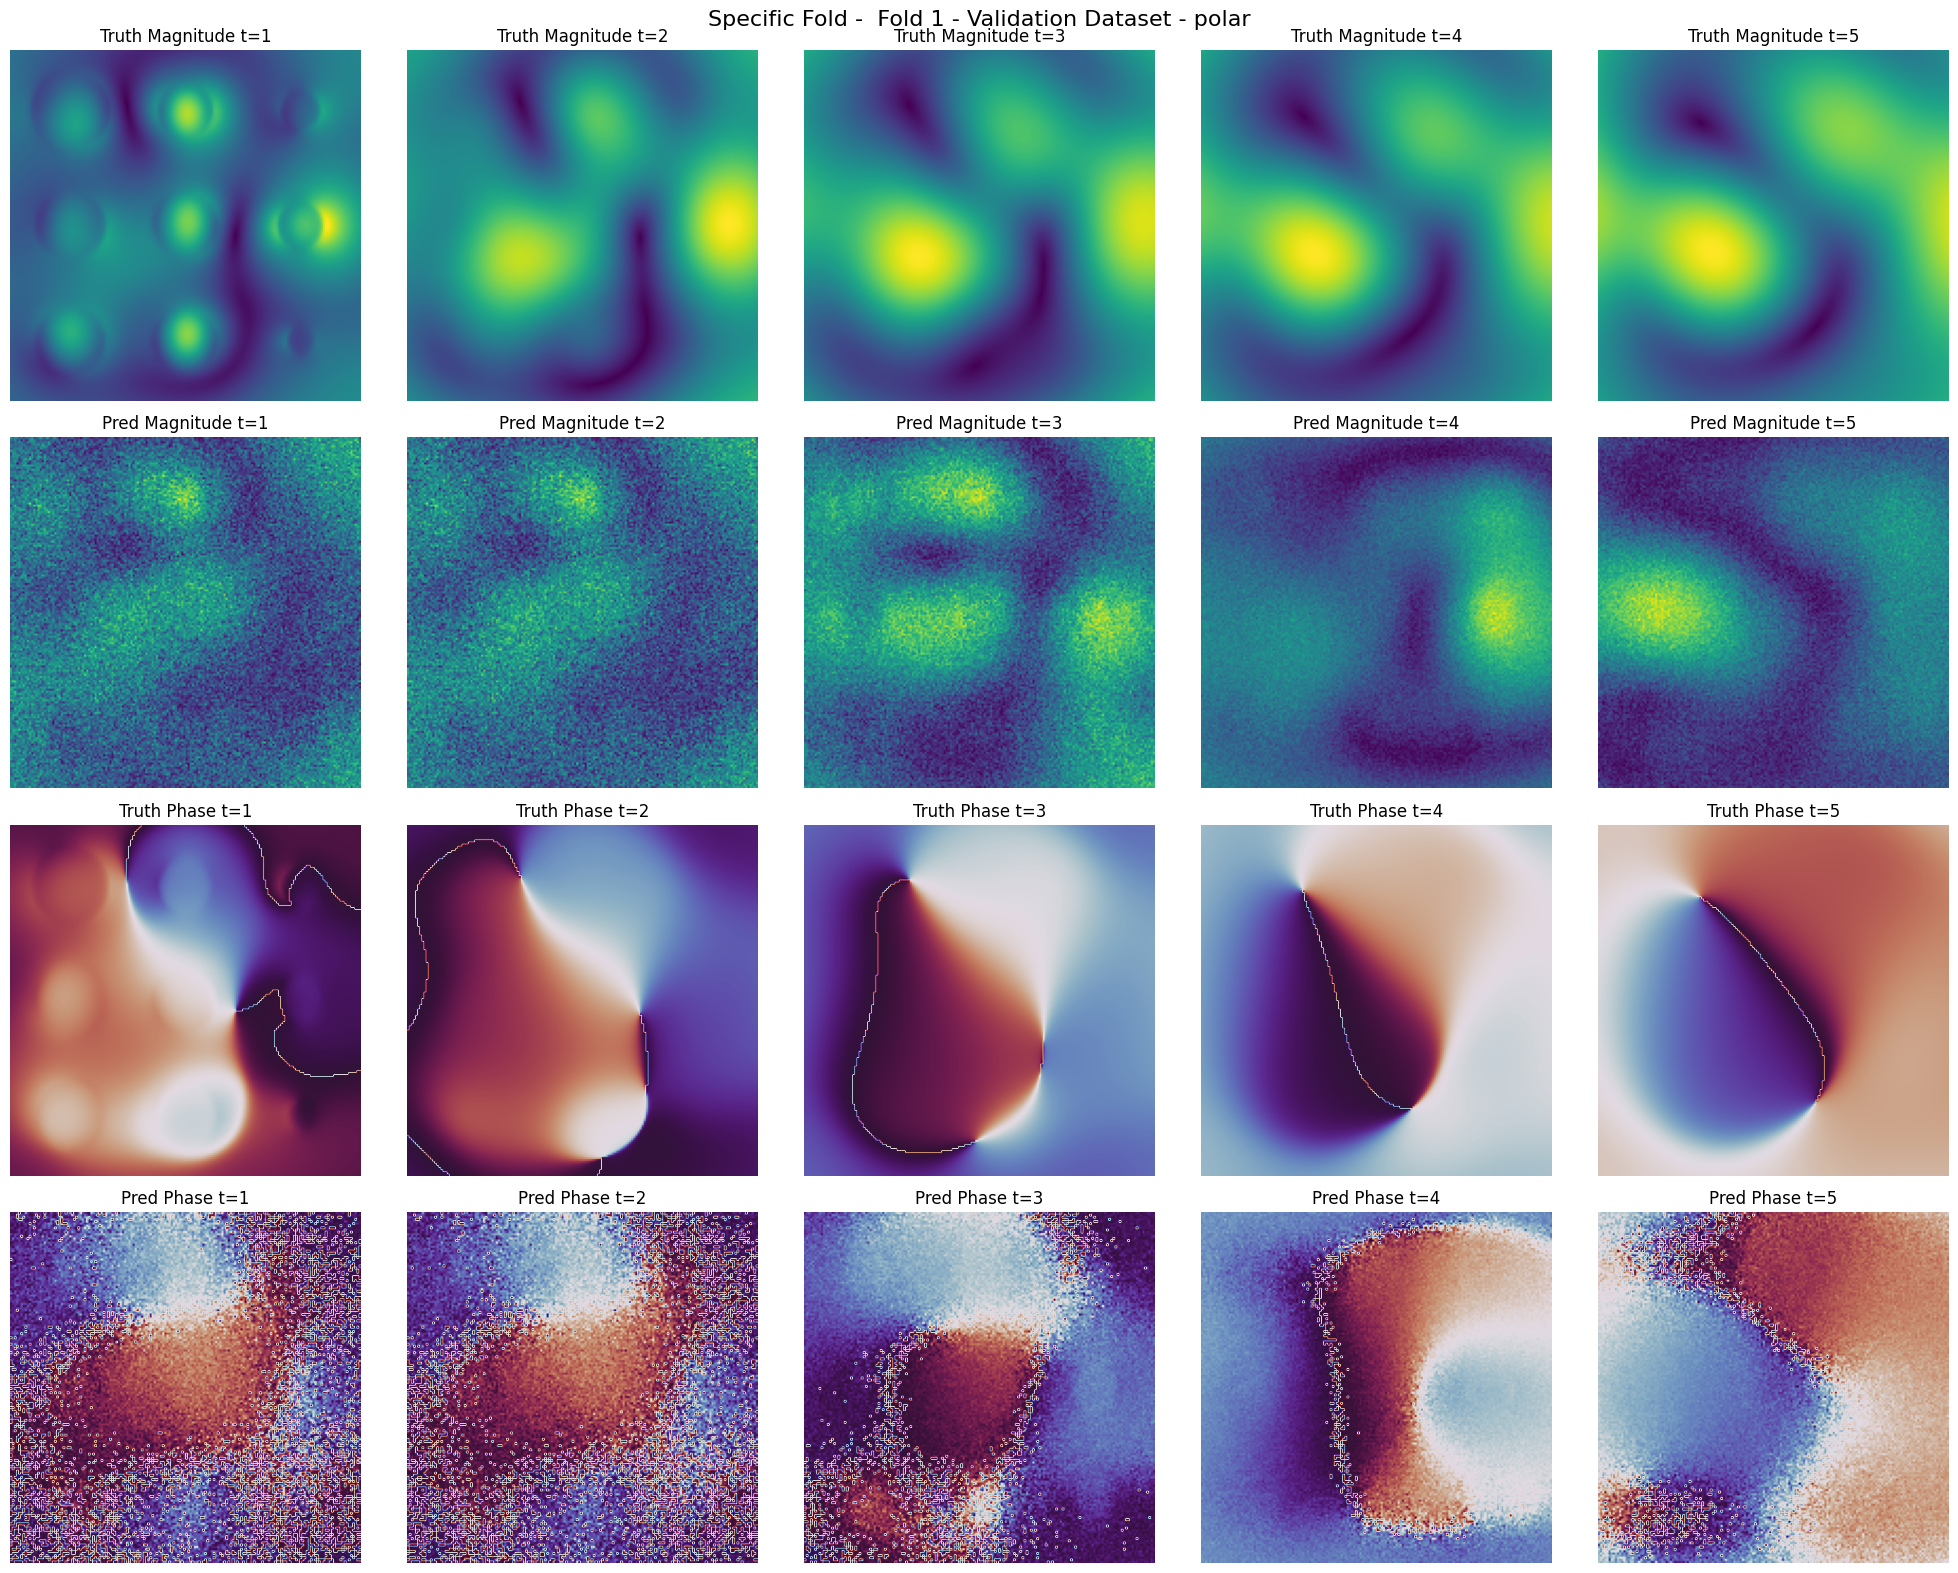

In [3]:
plt.close('all')

eval.plot_dft_fields(fold_results, fold_idx=0, plot_type="specific", sample_idx=4, save_fig=True, save_dir=save_dir, arch='lstm', format='polar')

In [11]:
# animate true intesnity and pred intensity
#import sys
#sys.path.append('../')
import torch
import utils.visualize as viz
from utils import mapping

sample_idx = 5
results = fold_results[0]['valid']
truth_real = torch.from_numpy(results['nf_truth'][sample_idx, :, 0, :, :])
truth_imag = torch.from_numpy(results['nf_truth'][sample_idx, :, 1, :, :])
pred_real = torch.from_numpy(results['nf_pred'][sample_idx, :, 0, :, :])
pred_imag = torch.from_numpy(results['nf_pred'][sample_idx, :, 1, :, :])
truth_real = truth_real.permute(1, 2, 0)
truth_imag = truth_imag.permute(1, 2, 0)
pred_real = pred_real.permute(1, 2, 0)
pred_imag = pred_imag.permute(1, 2, 0)

truth_mag, truth_phase = mapping.cartesian_to_polar(truth_real, truth_imag)
pred_mag, pred_phase = mapping.cartesian_to_polar(pred_real, pred_imag)
print(truth_real.shape, pred_real.shape)

# intensity
truth_anim = viz.animate_fields(truth_mag, "True Intensity", 
                                save_path=f"../../../results/flipbooks/sample_{sample_idx}_intensity_groundtruth.gif", 
                                frames=5,
                                interval=250)
pred_anim = viz.animate_fields(pred_mag, "Predicted Intensity", 
                               save_path=f"../../../results/flipbooks/sample_{sample_idx}_intensity_prediction.gif", 
                               frames=5,
                               interval=250)

# phase
truth_phase_anim = viz.animate_fields(truth_phase, "True Phase", 
                                save_path=f"../../../results/flipbooks/sample_{sample_idx}_phase_groundtruth.gif", 
                                cmap='twilight_shifted',
                                frames=5,
                                interval=250)
pred_phase_anim = viz.animate_fields(pred_phase, "Predicted Phase", 
                               save_path=f"../../../results/flipbooks/sample_{sample_idx}_phase_prediction.gif", 
                               cmap='twilight_shifted',
                               frames=5,
                               interval=250)



torch.Size([166, 166, 5]) torch.Size([166, 166, 5])
